In [85]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import folium
from folium import plugins
#import geopandas.tools



In [86]:
df1 = pd.read_csv('DataScientist.csv')
df1

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,3904,4375,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,4.4,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
3905,3905,4376,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...",5.0,"Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
3906,3906,4377,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1,-1
3907,3907,4378,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,-1,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),-1,-1


In [87]:
print("There are " + str(df1.duplicated().sum()) + " duplicated rows in the dataset \nNumber of rows: " + str(df1.shape[0]))

There are 0 duplicated rows in the dataset 
Number of rows: 3909


In [88]:
df1 = df1.drop(columns = "Unnamed: 0")

In [89]:
print('Data type for each column:\n')
df1.dtypes

Data type for each column:



index                  int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Easy Apply            object
dtype: object

In [90]:
df1_sample1 = df1.replace([-1,'-1'], np.nan)

In [91]:
df1_sample1.isnull().sum()
#'Easy Apply column' had 90% of values as -1 (null)

index                   0
Job Title               0
Salary Estimate         0
Job Description         0
Rating                409
Company Name            0
Location                0
Headquarters          240
Size                  229
Founded               977
Type of ownership     229
Industry              546
Sector                546
Revenue               229
Competitors          2760
Easy Apply           3745
dtype: int64

In [92]:
df1['Easy Apply'] = df1['Easy Apply'].replace(['-1'], False)

In [93]:
df2 = df1.replace([-1, '-1', 'Unknown', 'Unknown / Non-Applicable'], np.nan)


In [94]:
df2.isnull().sum()

index                   0
Job Title               0
Salary Estimate         0
Job Description         0
Rating                409
Company Name            0
Location                0
Headquarters          240
Size                  306
Founded               977
Type of ownership     267
Industry              546
Sector                546
Revenue              1392
Competitors          2760
Easy Apply              0
dtype: int64

In [95]:
print("This is the percentage of missing values for all columns: ")
round((df2.isnull().sum()/df2.shape[0]) * 100,2)


This is the percentage of missing values for all columns: 


index                 0.00
Job Title             0.00
Salary Estimate       0.00
Job Description       0.00
Rating               10.46
Company Name          0.00
Location              0.00
Headquarters          6.14
Size                  7.83
Founded              24.99
Type of ownership     6.83
Industry             13.97
Sector               13.97
Revenue              35.61
Competitors          70.61
Easy Apply            0.00
dtype: float64

In [96]:
round(df2['Rating'].mean(),2)
df2['Rating'] = df2['Rating'].fillna(value=round(df2['Rating'].mean(),2))
df2
df2['Salary Estimate'].unique()

array(['$111K-$181K (Glassdoor est.)', '$120K-$140K (Glassdoor est.)',
       '$119K-$147K (Glassdoor est.)', '$74K-$124K (Glassdoor est.)',
       '$102K-$121K (Glassdoor est.)', '$129K-$210K (Glassdoor est.)',
       '$156K-$254K (Glassdoor est.)', '$116K-$152K (Glassdoor est.)',
       '$133K-$171K (Glassdoor est.)', '$110K-$139K (Glassdoor est.)',
       '$82K-$141K (Glassdoor est.)', '$96K-$119K (Glassdoor est.)',
       '$146K-$175K (Glassdoor est.)', '$102K-$164K (Glassdoor est.)',
       '$113K-$180K (Glassdoor est.)', '$76K-$122K (Glassdoor est.)',
       '$134K-$218K (Glassdoor est.)', '$76K-$125K (Glassdoor est.)',
       '$132K-$208K (Glassdoor est.)', '$83K-$105K (Glassdoor est.)',
       '$75K-$143K (Glassdoor est.)', '$34K-$72K (Glassdoor est.)',
       '$37K-$75K (Glassdoor est.)', '$113K-$184K (Glassdoor est.)',
       '$136K-$164K (Glassdoor est.)', '$34-$53 Per Hour(Glassdoor est.)',
       '$46K-$80K (Glassdoor est.)', '$79K-$130K (Glassdoor est.)',
       '$91K-$10

In [97]:
# Employer_est_count = df2['Salary Estimate'].str.contains('(Employer est.)').sum()
# Per_Hour_count = df2['Salary Estimate'].str.contains('Per Hour').sum()
# Glassdoor_est_count = df2['Salary Estimate'].str.contains('(Glassdoor est.)').sum()
# if Employer_est_count>0:
#     print (Employer_est_count)
# if Per_Hour_count>0:
#     print (Per_Hour_count)
# if Glassdoor_est_count>0:
#     print(Glassdoor_est_count)
# Employer_est_count + Glassdoor_est_count

df2['Size'].unique()

array(['501 to 1000 employees', '1001 to 5000 employees',
       '1 to 50 employees', '201 to 500 employees', '51 to 200 employees',
       '10000+ employees', '5001 to 10000 employees', nan], dtype=object)

In [98]:
for i in range(df2.shape[0]):
    new_Salary = df2.loc[i,"Salary Estimate"]
    new_Salary = new_Salary.replace( "$", "")
    new_Salary2 = new_Salary.replace('K','000')
   
    #consider cases where row contains 'Per Hour'
    if 'Per' in new_Salary2:
        lower, upper = new_Salary2.split('-')
        upper, END = upper.split('Per')
        upper=upper.strip()
        #covert 'per hour values into per annum values'
        #assume 40 hour work weeks
        #52 weeks in year, assuming you work every week
        upper = int(upper) * 52 * 40
        lower = int(lower) * 52 * 40
        
    else:
        lower, upper = new_Salary2.split('-')
        upper=upper.strip()
        upper, END = upper.split('(')
      
   #two new columns
    df2.loc[i,"Lower Salary Estimate"] = lower
    df2.loc[i,"Upper Salary Estimate"] = upper
    

#df2 = df2.drop(columns  = 'Salary Estimate')
#df2['Lower Salary Estimate'].unique()
#df2['Upper Salary Estimate'].unique()
    

In [99]:
df2['Size'] = df2['Size'].replace(np.nan, '-1')
for i in range(df2.shape[0]):
    new_Size = df2.loc[i, "Size"]
    if 'to' in new_Size:
        lower, upper= new_Size.split('to')
        lower = lower.strip()
        upper = upper.strip()
        upper, END = upper.split(' ')
        
    elif '+' in new_Size:
        lower = new_Size.replace("+ employees", "")
        upper = np.inf
    else:
        lower=np.nan
        upper=np.nan
    df2.loc[i,"Lower Size"] = lower
    df2.loc[i,"Upper Size"] = upper

In [100]:
cols = df2.columns.tolist()
cols
df2 = df2[['index',
 'Job Title',
 'Salary Estimate',
 'Lower Salary Estimate',
 'Upper Salary Estimate',
 'Job Description',
 'Rating',
 'Company Name',
 'Location',
 'Headquarters',
 'Size',
 'Lower Size',
 'Upper Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Competitors',
 'Easy Apply']]

In [101]:
df2['Revenue'].unique()

array([nan, '$100 to $500 million (USD)',
       '$500 million to $1 billion (USD)', '$10+ billion (USD)',
       '$25 to $50 million (USD)', '$1 to $5 million (USD)',
       '$5 to $10 billion (USD)', '$5 to $10 million (USD)',
       '$50 to $100 million (USD)', '$1 to $2 billion (USD)',
       '$2 to $5 billion (USD)', 'Less than $1 million (USD)',
       '$10 to $25 million (USD)'], dtype=object)

In [102]:
df2['Revenue'] = df2['Revenue'].replace(np.nan, '-1')
for i in range(df2.shape[0]):
    rev = df2.loc[i, "Revenue"]
     
    if '$' in rev:
        rev = rev.replace('$', '')
        if 'to' in rev:
            lower,upper = rev.split('to')
            if 'million' in lower:
                lower=lower.replace(' million', '000000')
                lower,END = lower.split(' ') 
                int(lower)

            if 'billion' in upper:
                upper= upper.replace(' billion', '000000000')
                END,upper,END = upper.split(' ')
                lower = lower.replace(' ','000000000')
                int(upper)
            elif 'million' in upper:
                upper= upper.replace(' million', '000000')
                END,upper,END = upper.split(' ') 
                lower = lower.replace(' ','000000')
                int(upper)

        elif 'Less' in rev:
            END,upper = rev.split('than') 
            upper = upper.replace(' million (USD)', '000000')        
            lower = 0
            upper=int(upper) - 1
            
        elif '+' in rev:
            upper = np.inf
            lower,END = rev.split('+')
            lower = int(lower)* (10**6) + 1
    else:
        lower = np.nan
        upper = np.nan
    
    df2.loc[i,'upper revenue'] = upper
    df2.loc[i,'lower revenue'] = lower

    Company_Name = df2.loc[i, 'Company Name']
    if '\n' in Company_Name:
        new_Comp, _ = Company_Name.split('\n')
    df2.loc[i,'Company_Name'] = new_Comp

    Job_Description = df2.loc[i, 'Job Description']
    if '\n' in Job_Description:
        JD = Job_Description.replace('\n', ' ')
    df2.loc[i,'Job_Description'] = JD

    Location_State = df2.loc[i, 'Location']
    Location,Location_State = Location_State.split(',')
    Location_State = Location_State.strip()
    if 'AZ' in Location_State:
        Location_State = Location_State.replace('AZ', 'Arizona')
    elif 'CA' in Location_State:
        Location_State = Location_State.replace('CA', 'California')
    elif 'DE' in Location_State:
        Location_State = Location_State.replace('DE', 'Delaware')
    elif 'FL' in Location_State:
        Location_State = Location_State.replace('FL', 'Florida')
    elif 'IL' in Location_State:
        Location_State = Location_State.replace('IL', 'Illinois')
    elif 'NJ' in Location_State:
        Location_State = Location_State.replace('NJ', 'New Jersey')
    elif 'NY' in Location_State:
        Location_State = Location_State.replace('NY', 'New York')
    elif 'OH' in Location_State:
        Location_State = Location_State.replace('OH', 'Ohio')
    elif 'PA' in Location_State:
        Location_State = Location_State.replace('PA', 'Pennsylvania')
    elif 'TX' in Location_State:
        Location_State = Location_State.replace('TX', 'Texas')
    

    df2.loc[i,'State'] = Location_State
    df2.loc[i,'Location_'] = Location




#df2[['Lower Salary Estimate','Upper Salary Estimate','lower revenue','upper revenue','Lower Size','Upper Size']] = df2[['Lower Salary Estimate','Upper Salary Estimate','lower revenue','upper revenue','Lower Size','Upper Size']].apply(pd.to_numeric)
df2 = df2.drop(columns  = 'Salary Estimate')
df2 = df2.drop(columns  = 'Revenue')
df2 = df2.drop(columns  = 'Company Name')
df2 = df2.drop(columns  = 'Size')

df2 = df2.drop(columns  = 'Competitors')
df2 = df2.drop(columns  = 'Easy Apply')

df2['Job Description'] = df2['Job_Description']

upper
lower

'2000000000'

In [103]:

 df2 = df2[['index',
 'Job Title',
 'Lower Salary Estimate',
 'Upper Salary Estimate',
 'Job_Description',
 'Rating',
 'Company_Name',
 'Location',
 'Location_',
 'State',
 'Headquarters',
 'Lower Size',
 'Upper Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'lower revenue',
 'upper revenue',
 ]]


In [104]:
df2

,index,Job Title,Lower Salary Estimate,Upper Salary Estimate,Job_Description,Rating,Company_Name,Location,Location_,State,Headquarters,Lower Size,Upper Size,Founded,Type of ownership,Industry,Sector,lower revenue,upper revenue
0,0,Senior Data Scientist,111000,181000,"ABOUT HOPPER At Hopper, we’re on a mission to...",3.50,Hopper,"New York, NY",New York,New York,"Montreal, Canada",501,1000,2007.0,Company - Private,Travel Agencies,Travel & Tourism,NaN,NaN
1,1,"Data Scientist, Product Analytics",111000,181000,"At Noom, we use scientifically proven methods ...",4.50,Noom US,"New York, NY",New York,New York,"New York, NY",1001,5000,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,NaN,NaN
2,2,Data Science Manager,111000,181000,Decode_M https://www.decode-m.com/ Data Scie...,3.78,Noom US,"New York, NY",New York,New York,"New York, NY",1,50,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Data Analyst,111000,181000,Sapphire Digital seeks a dynamic and driven mi...,3.40,Sapphire Digital,"Lyndhurst, NJ",Lyndhurst,New Jersey,"Lyndhurst, NJ",201,500,2019.0,Company - Private,Internet,Information Technology,NaN,NaN
4,4,"Director, Data Science",111000,181000,"Director, Data Science - (200537) Description ...",3.40,United Entertainment Group,"New York, NY",New York,New York,"New York, NY",51,200,2007.0,Company - Private,Advertising & Marketing,Business Services,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,4375,AWS Data Engineer,55000,112000,About Us Tachyon Technologies is a Digital Tr...,4.40,Tachyon Technologies,"Dublin, OH",Dublin,Ohio,"Irving, TX",201,500,2011.0,Company - Private,IT Services,Information Technology,10000000,25000000
3905,4376,Data Analyst â Junior,55000,112000,"Job description Interpret data, analyze result...",5.00,"Staffigo Technical Services, LLC","Columbus, OH",Columbus,Ohio,"Woodridge, IL",51,200,2008.0,Company - Private,IT Services,Information Technology,50000000,100000000
3906,4377,Security Analytics Data Engineer,55000,112000,Job DescriptionThe Security Analytics Data Eng...,3.80,"PDS Tech, Inc.","Dublin, OH",Dublin,Ohio,"Irving, TX",5001,10000,1977.0,Company - Private,Staffing & Outsourcing,Business Services,100000000,500000000
3907,4378,Security Analytics Data Engineer,55000,112000,Job DescriptionThe Security Analytics Data Eng...,4.00,Data Resource Technologies,"Dublin, OH",Dublin,Ohio,"Omaha, NE",1,50,NaN,Company - Private,Accounting,Accounting & Legal,0,999999


In [105]:
df2.dtypes


index                      int64
Job Title                 object
Lower Salary Estimate     object
Upper Salary Estimate     object
Job_Description           object
Rating                   float64
Company_Name              object
Location                  object
Location_                 object
State                     object
Headquarters              object
Lower Size                object
Upper Size                object
Founded                  float64
Type of ownership         object
Industry                  object
Sector                    object
lower revenue             object
upper revenue             object
dtype: object

In [106]:
#df2.Industry.value_counts()
#df2.Industry.unique()

In [107]:
df2.Sector.value_counts()
df2.Sector.unique()

array(['Travel & Tourism', 'Consumer Services', nan,
       'Information Technology', 'Business Services', 'Insurance',
       'Finance', 'Retail', 'Media', 'Restaurants, Bars & Food Services',
       'Agriculture & Forestry', 'Non-Profit', 'Education', 'Government',
       'Health Care', 'Oil, Gas, Energy & Utilities',
       'Accounting & Legal', 'Manufacturing', 'Real Estate',
       'Biotech & Pharmaceuticals', 'Arts, Entertainment & Recreation',
       'Aerospace & Defense', 'Construction, Repair & Maintenance',
       'Transportation & Logistics', 'Telecommunications',
       'Mining & Metals'], dtype=object)

In [108]:
df2 = df2.dropna(subset=['Industry', 'Sector', 'lower revenue','Founded','upper revenue'])
convert_dict = {'Lower Salary Estimate': float,
                'Upper Salary Estimate': float,
                'Lower Size': float,
                'Upper Size': float,
                'Founded': float,
                'lower revenue': float,
                'upper revenue': float,
               }

df2 = df2.astype(convert_dict)
df2

,index,Job Title,Lower Salary Estimate,Upper Salary Estimate,Job_Description,Rating,Company_Name,Location,Location_,State,Headquarters,Lower Size,Upper Size,Founded,Type of ownership,Industry,Sector,lower revenue,upper revenue
11,11,Data Scientist/Machine Learning,111000.0,181000.0,"PulsePoint™, a global programmatic advertising...",4.4,PulsePoint,"New York, NY",New York,New York,"New York, NY",51.0,200.0,2011.0,Company - Private,Internet,Information Technology,100000000.0,5.000000e+08
12,12,"Data Scientist, Acorn AI Labs",111000.0,181000.0,Medidata: Conquering Diseases Together Medida...,4.3,Medidata Solutions,"New York, NY",New York,New York,"New York, NY",1001.0,5000.0,1999.0,Company - Public,Enterprise Software & Network Solutions,Information Technology,500000000.0,1.000000e+09
16,16,"Data Scientist, Analytics",111000.0,181000.0,Data Scientist Affinity Solutions / Marketing ...,3.6,Etsy,"Brooklyn, NY",Brooklyn,New York,"Brooklyn, NY",501.0,1000.0,2005.0,Company - Public,Other Retail Stores,Retail,100000000.0,5.000000e+08
17,17,Data Scientist/ML Engineer,111000.0,181000.0,Data Scientist/ML Engineer Apply Now Become ...,3.3,PA Consulting,"New York, NY",New York,New York,"London, United Kingdom",1001.0,5000.0,1943.0,Company - Private,Consulting,Business Services,100000000.0,5.000000e+08
18,18,Data Scientist,111000.0,181000.0,Job Description Company Description As an Ets...,3.6,Etsy,"New York, NY",New York,New York,"Brooklyn, NY",501.0,1000.0,2005.0,Company - Public,Other Retail Stores,Retail,100000000.0,5.000000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901,4372,Principal Data Engineer,55000.0,112000.0,ComResource is looking for a Principal Data En...,4.6,ComResource,"Columbus, OH",Columbus,Ohio,"Columbus, OH",201.0,500.0,1991.0,Company - Private,IT Services,Information Technology,25000000.0,5.000000e+07
3903,4374,Cyber Security Data Engineer,55000.0,112000.0,#Columbus Data Science Tutor Jobs Varsity Tut...,3.9,ApTask,"Dublin, OH",Dublin,Ohio,"Iselin, NJ",201.0,500.0,2010.0,Company - Private,IT Services,Information Technology,50000000.0,1.000000e+08
3904,4375,AWS Data Engineer,55000.0,112000.0,About Us Tachyon Technologies is a Digital Tr...,4.4,Tachyon Technologies,"Dublin, OH",Dublin,Ohio,"Irving, TX",201.0,500.0,2011.0,Company - Private,IT Services,Information Technology,10000000.0,2.500000e+07
3905,4376,Data Analyst â Junior,55000.0,112000.0,"Job description Interpret data, analyze result...",5.0,"Staffigo Technical Services, LLC","Columbus, OH",Columbus,Ohio,"Woodridge, IL",51.0,200.0,2008.0,Company - Private,IT Services,Information Technology,50000000.0,1.000000e+08


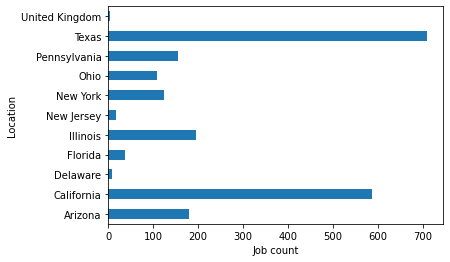

In [109]:
dfJobPlot = df2.groupby(['State'])['Job Title'].count().plot(kind='barh')
plt.ylabel('Location')
plt.xlabel('Job count')
plt.show()

In [110]:
df21 = df2.groupby(['State'])['Job Title'].count().to_frame().reset_index()
df21.rename(columns = {'State':'Location', 'Job Title':'No. of Jobs'}, inplace=True)
df21

,Location,No. of Jobs
0,Arizona,179
1,California,587
2,Delaware,8
3,Florida,37
4,Illinois,195
5,New Jersey,16
6,New York,124
7,Ohio,108
8,Pennsylvania,154
9,Texas,710


In [111]:
px.bar(df21,x='Location', y='No. of Jobs', title = 'Number of Jobs per Location', height =700)
# px.bar(df21,x='State', y='Job Title')

In [112]:
# fig = px.line_polar(df21,r='Job Title', theta = 'State', line_close=True)

In [113]:
df22 = df2.groupby(['Sector'])['Job Title'].count().to_frame().reset_index()
df22.rename(columns = {'Job Title':'No. of Jobs'}, inplace=True)
df22.sort_values(by=['No. of Jobs'], ascending = True, inplace=True)

In [114]:
px.bar(df22, x='No. of Jobs',y='Sector', orientation ='h', height = 700,)

In [115]:
dftest = df2.loc[df2['Sector']=='Information Technology']

In [116]:
figx  =px.imshow(df22)

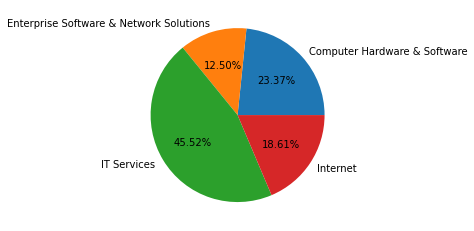

In [117]:
dft2 = dftest.groupby(['Industry'])['Job Title'].count().to_frame().reset_index()
#
labels = dft2['Industry']
x = dft2['Job Title']
plt.pie(x,labels=labels, autopct='%1.2f%%')

fig = px.pie(dft2, values='Job Title', names='Industry')

In [118]:
fig

In [119]:
# box plot of lower salary estimates for each industry, ordered by industry with most entries
my_order = df2.Industry.value_counts().iloc[0:].index
fig2 = px.box(df2, x="Industry", y="Lower Salary Estimate", category_orders = {'Industry': my_order})
fig2

In [120]:
# we can also do this for upper salary
fig3 = px.box(df2, x="Industry", y="Upper Salary Estimate", category_orders = {'Industry': my_order})
fig3

In [121]:
#dfv = df2.groupby(['Location_'])['Lower Salary Estimate'].count().to_frame().reset_index()
#dfv.plot(x = 'Location_', y = 'Lower Salary Estimate', kind='scatter')

In [122]:
df2['Median Salary Estimate']=df2[["Lower Salary Estimate","Upper Salary Estimate"]].mean(axis=1)
df2 = df2[['index',
 'Job Title',
 'Lower Salary Estimate',
 'Median Salary Estimate',
 'Upper Salary Estimate',
 'Job_Description',
 'Rating',
 'Company_Name',
 'Location',
 'Location_',
 'State',
 'Headquarters',
 'Lower Size',
 'Upper Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'lower revenue',
 'upper revenue',
 ]]

In [123]:
fig4 = px.scatter(df2, x="State", y="Median Salary Estimate") #category_orders = {'Industry': my_order}
fig4

In [124]:
fig5 = px.box(df2, x="State", y="Median Salary Estimate" ,category_orders = {'State': my_order})
fig5

In [125]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

In [126]:
# longitude = []
# latitude = []
# def findGeocode(city):
#     try:
#         geolocator = Nominatim(user_agent="Viz_assignment")
#         return geolocator.geocode(city)
#     except GeocoderTimedOut:
#         return findGeocode(city)  

# for i in (df2["Location"]):
#     if findGeocode(i) != None:
#         loc = findGeocode(i)
#         latitude.append(loc.latitude)
#         longitude.append(loc.longitude)
#     else:
#         latitude.append(np.nan)
#         longitude.append(np.nan)

In [127]:
geolocator = Nominatim(user_agent="_assignment")
# entering a random location from the data
# will print out the longitude and latitude of that exact location
location = geolocator.geocode('Evergreen Park, IL')
print((location.latitude, location.longitude))


(41.720136, -87.7013258)


In [144]:
loc = geolocator.geocode('4550 Kester Mill Rd,Winston-Salem,NC')
(location.latitude, location.longitude)

In [129]:
# unique locations in dataset
uniqueLoc = df2['Location'].unique()
longitude = []
latitude = []
locs_dict={}
def findGeocode(city, attempt=1, max_attempts=5):
    try:
        geolocator = Nominatim(user_agent="_assignment")
        return geolocator.geocode(city)
    except GeocoderTimedOut:
        if attempt <= max_attempts:
            return findGeocode(city, attempt=attempt+1)
        raise

for i in (uniqueLoc):
    if findGeocode(i) != None:
        loc = findGeocode(i)
        lat = loc.latitude
        long = loc.longitude
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
        locs_dict[i] = [lat, long]
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)
    

In [148]:
for i in df2.index:
    Locations = str(df2.copy().loc[i,'Location'])
    if  Locations in locs_dict.keys():
        longitude = locs_dict[Locations][1]
        latitude = locs_dict[Locations][0]
    df2.loc[i, 'Longitude'] = longitude
    df2.loc[i, 'Latitude'] = latitude
df2 = df2[['index',
 'Job Title',
 'Lower Salary Estimate',
 'Median Salary Estimate',
 'Upper Salary Estimate',
 'Job_Description',
 'Rating',
 'Company_Name',
 'Location',
 'Longitude',
 'Latitude',
 'Location_',
 'State',
 'Headquarters',
 'Lower Size',
 'Upper Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'lower revenue',
 'upper revenue',
 ]]


(36.06752315, -80.3372069310351)

In [131]:
map = folium.Map([41.8781, -87.6298], zoom_start=5)

In [132]:
# for index, row in df2.iterrows():
#     folium.CircleMarker([row['Latitude'], row['Longitude']],
#                         radius=15,
#                         popup=row['Location'],
#                         fill_color="#3db7e4", # divvy color
#                        ).add_to(map)



In [133]:
JobArr = df2[['Latitude', 'Longitude']]
fig6 = map.add_child(plugins.HeatMap(JobArr, radius=15))

In [134]:
fig6

In [135]:
dfState1 = df2[df2['State'] == 'Texas'].groupby(['Sector'])['Job Title'].count().to_frame().reset_index()
dfState2 = df2[df2['State'] == 'California'].groupby(['Sector'])['Job Title'].count().to_frame().reset_index()
 #dftest.groupby([df2['State'] == 'California'])['Industry'].count()
 #
#  dfState.groupby(['Industry'])['Job Title'])

In [136]:
dfTC = pd.merge(dfState1, dfState2,on='Sector')

In [137]:
dfTC = dfTC.fillna(0)
# filter out Jobs with count less than 10
dfTC = dfTC[(dfTC['Job Title_x']>= 10) &  (dfTC['Job Title_y']>=10)]


In [138]:
trace1 = go.Bar(x=dfTC['Sector'],
                 y=dfTC['Job Title_x'],
                 name='Texas'
                )
trace2 = go.Bar(x=dfTC['Sector'],
                 y=dfTC['Job Title_y'],
                 name='California'
                )

data=[trace1,trace2]
layout=go.Layout(barmode='group', bargap=0.20)
fig7=go.Figure(data=data,layout=layout)
fig7

In [139]:
dfTC2 = df2[(df2['State']=='California') | (df2['State']=='Texas')]

In [140]:
dfx = dfTC2[dfTC2['Sector']=='Biotech & Pharmaceuticals']

In [141]:
my_order2 = df2.Sector.value_counts().iloc[0:].index
fig8 = px.box(df2, x="Sector", y="Lower Salary Estimate", category_orders = {'Sector': my_order2} )

In [142]:
fig8